# Import Libraries

## Load External Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Load Internal Classes and Functions

In [2]:
from library.LinearRegressionCustomModel1 import LinearRegressionCustomModel1
from library.LinearRegressionCustomModel2 import LinearRegressionCustomModel2
from library.utils import (
    prepare_data,
    computeOptimalParameters,
    computeOptimalTrainSize,
)

# Analysis of the "Advertising.csv" dataset 

## Load the data

In [3]:
# Load data from csv file
advertising_df = pd.read_csv("./data/Advertising.csv", index_col=0)
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##  Display shape and summary of the dataset

In [4]:
# Shape of the data
advertising_df.shape

(200, 4)

In [5]:
# Statistical description of the data
advertising_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Pairplot of the dataset to visualize the relationship between the features and the sales

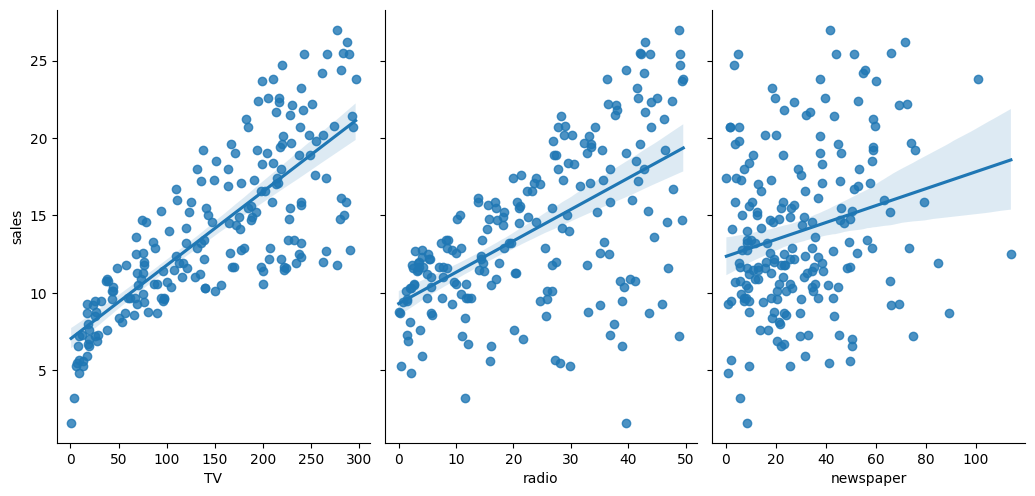

In [6]:
# Plot raw data
sns.pairplot(
    advertising_df,
    x_vars=["TV", "radio", "newspaper"],
    y_vars="sales",
    height=5,
    aspect=0.7,
    kind="reg",
)

## Compute the correlation matrix

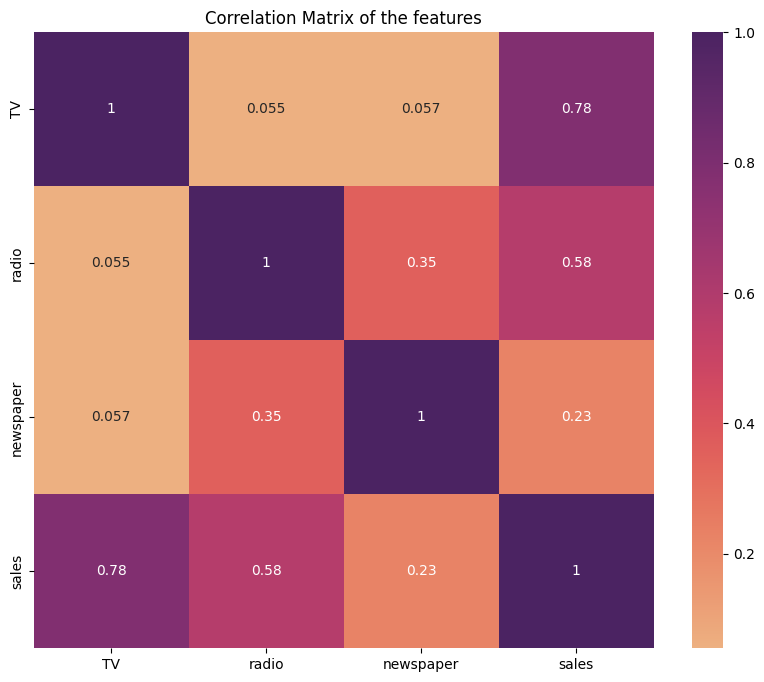

In [7]:
# Compute correlation matrix and plot it
correlation_matrix = advertising_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="flare", annot=True)
plt.title("Correlation Matrix of the features")
plt.show()

# Test of the multivariate linear regression class on the "Advertising.csv" dataset

## Test of the custom class with two predictors: TV and radio to predict sales

### Find the optimal hyperparameters for the multivariate linear regression class

In [8]:
# Optimal Ratio of Training and Test Data 
r = 3 # Amount of features
optimalTrainSize = computeOptimalTrainSize(r)
print("Optimal train size:", optimalTrainSize)

Optimal train size: 0.6339745962155614


### Prepare the data

In [9]:
# Prepare data
x = advertising_df[['TV', 'radio']] # Load features
y = advertising_df['sales'] # Load target
x_train, x_test, y_train, y_test = prepare_data(x, y, optimalTrainSize)
x_train.head()

,TV,radio
181,0.103011,-1.362102
22,1.035971,-1.198674
99,1.639854,1.233124
142,0.531388,0.782064
116,-0.838030,0.755916


### Compute the optimal parameters for the models

In [1]:
# Compute optimal hyperparameters for model 1
(
    iterations_nb_model_1,
    learning_rate_model_1,
    results_model_1,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, 1)

# Compute optimal hyperparameters for model 2
(
    iterations_nb_model_2,
    learning_rate_model_2,
    results_model_2,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, "linear 2")

# Print results
print("Optimal hyperparameters for model 1:")
print("Iterations number:", iterations_nb_model_1)
print("Learning rate:", learning_rate_model_1)
print("")
print("Optimal hyperparameters for model 2:")
print("Iterations number:", iterations_nb_model_2)
print("Learning rate:", learning_rate_model_2)

NameError: name 'computeOptimalParameters' is not defined

### Compute the Linear Regression model with the optimal parameters

In [11]:
print("Computing Linear Regression with optimal hyperparameters for model 1...\n")

# Initialise model
model = LinearRegressionCustomModel1(learning_rate_model_1, iterations_nb_model_1)

# Fit model to training data
theta, cost = model.fit(x_train, y_train)
print("Linear Regression Coefficients:", theta)
print("Cost:", cost)
print("")

# Compute predictions
y_pred_1 = model.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters for model 1...

Linear Regression Coefficients: [13.95689628  3.94503342  2.89914991]
Cost: 3.2023863811303177

Metrics:
R squared: 0.9139532323349473
Mean absolute error: 1.1733646622518787
Mean squared error: 2.177042461574134
Root mean squared error: 1.4754804172113347


### Compute the second Linear Regression model with the optimal parameters

In [12]:
print("Computing Linear Regression with optimal hyperparameters for model 2...\n")

# Initialise model
model_2 = LinearRegressionCustomModel2(learning_rate_model_2, iterations_nb_model_2)

# Fit model
theta, cost = model_2.fit(x_train, y_train)
print("Linear Regression Coefficients:", theta)
print("Cost:", cost)
print("")

# Compute predictions
y_pred_1_model_2 = model_2.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model_2.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters for model 2...

Linear Regression Coefficients: [13.89761344  3.82783398  2.86677663  1.55046606]
Cost: 0.8605021881539476

Metrics:
R squared: 0.957344849230019
Mean absolute error: 0.7875023737572013
Mean squared error: 1.079204680791406
Root mean squared error: 1.0388477659365716


### Plot the predicted values against the actual values

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 1')

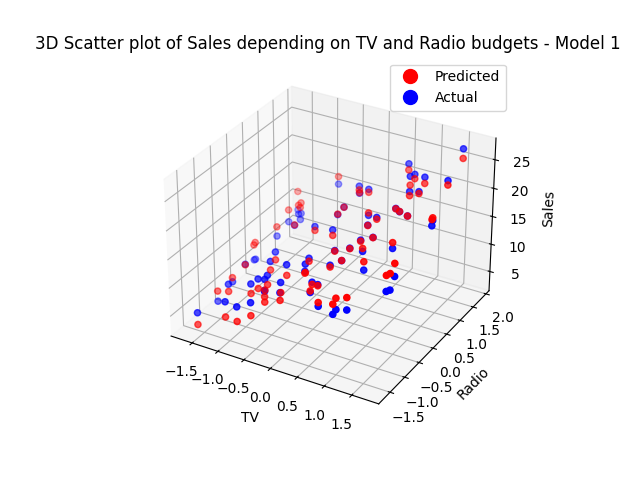

In [13]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1, c='r')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 1')

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 2')

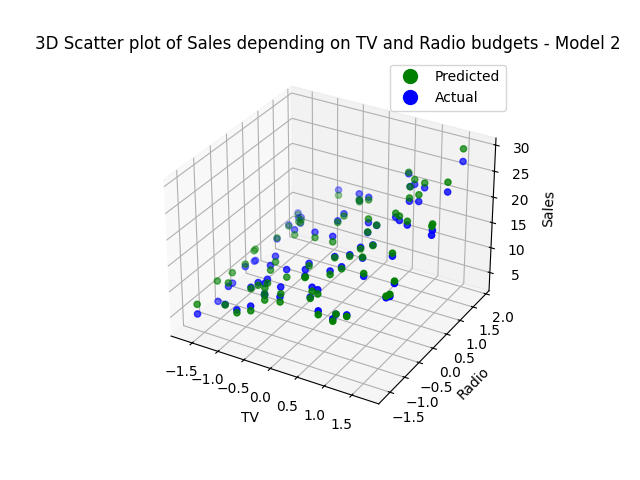

In [14]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1_model_2, c='g')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
green_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='green', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[green_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 2')

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 1 and 2')

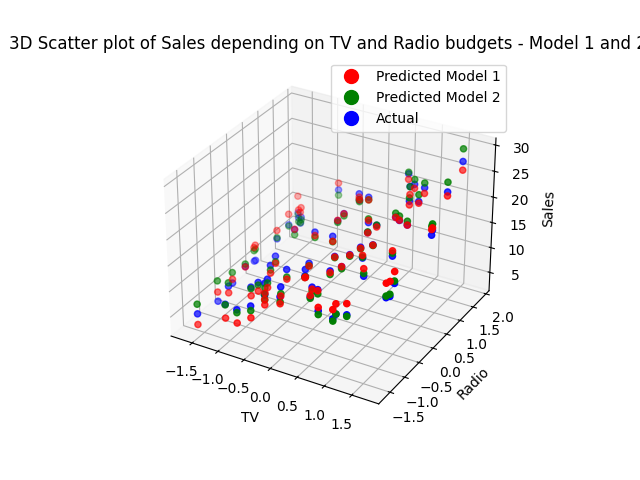

In [15]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1, c='r')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1_model_2, c='g')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted Model 1')
green_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='green', label='Predicted Model 2')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], green_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 1 and 2')

### Verification using the sklearn library

In [16]:
print("Computing Linear Regression with Scikit-Learn...\n")
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

# Testing the model
y_pred_verif_1 = model.predict(x_test)

# Evaluating the model
print('R squared:', metrics.r2_score(y_test, y_pred_verif_1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_1)))


Computing Linear Regression with Scikit-Learn...

R squared: 0.9132105569622789
Mean Absolute Error: 1.1670661161467613
Mean Square Error: 2.1958326598039877
Root Mean Square Error: 1.4818342214309899


Text(0.5, 0, 'Sales')

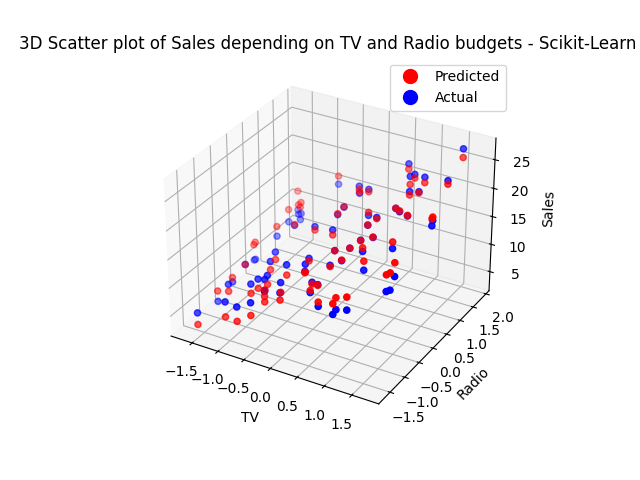

In [17]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_verif_1, c='r')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Scikit-Learn')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Test of the custom class with 3 predictors: TV, radio and newspaper to predict sales

### Find the optimal hyperparameters for the multivariate linear regression class

In [18]:
# Optimal Ratio of Training and Test Data 
r = 4 # Amount of features
optimalTrainSize = computeOptimalTrainSize(r)
print("Optimal train size:", optimalTrainSize)

Optimal train size: 0.6666666666666667


### Prepare the data 

In [19]:
# Prepare data
x = advertising_df[['TV', 'radio', 'newspaper']]
y = advertising_df['sales']
x_train, x_test, y_train, y_test = prepare_data(x, y, optimalTrainSize)

### Compute the optimal parameters for the model

In [20]:
# Compute optimal hyperparameters
iterations_nb, learning_rate, results = computeOptimalParameters(x_train, x_test, y_train, y_test, 1)

print("Optimal hyperparameters:")
print("Iterations number:", iterations_nb)
print("Learning rate:", learning_rate)

Optimal hyperparameters:
Iterations number: 300
Learning rate: 0.005


### Compute the Linear Regression model with the optimal parameters

In [21]:
print("Computing Linear Regression with optimal hyperparameters...\n")

# Initialise model
model = LinearRegressionCustomModel1(learning_rate, iterations_nb)

# Fit model
model.fit(x_train, y_train)

# Compute predictions
y_pred_2 = model.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters...

Metrics:
R squared: 0.8505503161618932
Mean absolute error: 1.2841709009521454
Mean squared error: 3.925976276658181
Root mean squared error: 1.981407650297682


### Verification using the sklearn library

In [22]:
print("Computing Linear Regression with Scikit-Learn...\n")

# Training the model
model = LinearRegression()

# Fitting the model to the training data
model.fit(x_train, y_train)

# Computing predictions
y_pred_verif_2 = model.predict(x_test)

# Evaluating the model
print("Metrics:")
print('R squared:', metrics.r2_score(y_test, y_pred_verif_2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_2)))

Computing Linear Regression with Scikit-Learn...

Metrics:
R squared: 0.8332052784146583
Mean Absolute Error: 1.3061018659921688
Mean Square Error: 4.381622651843232
Root Mean Square Error: 2.093232584268464
